In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image
import numpy as np

# Exploratory Data Analysis

## Analyzing Data Distribution

In [8]:


# Base directory where the traffic signs dataset is located.
base_dir = 'trafficsigns_dataset'

# This dictionary will hold the count of images for each type of sign.
sign_counts = {}

# Loop through each shape directory.
for shape in os.listdir(base_dir):
    shape_dir = os.path.join(base_dir, shape)
    
    # Check if it's a directory.
    if os.path.isdir(shape_dir):
        # Loop through each type of sign within the shape directory.
        for sign_type in os.listdir(shape_dir):
            sign_type_dir = os.path.join(shape_dir, sign_type)
            
            # Check if it's a directory and count the images.
            if os.path.isdir(sign_type_dir):
                num_images = len([item for item in os.listdir(sign_type_dir) if os.path.isfile(os.path.join(sign_type_dir, item))])
                sign_counts[f'{shape}/{sign_type}'] = num_images

# Output the result.
print("Following are the count of the number of imgages in each shape: \n")
for sign_type, count in sign_counts.items():
    print(f'{sign_type}: {count} images')


Following are the count of the number of imgages in each shape: 

diamond/rightofway: 282 images
hex/stop: 43 images
square/laneend: 118 images
square/parking: 276 images
square/continue: 199 images
square/crossing: 95 images
triangle/giveway: 231 images
triangle/warning: 695 images
round/traveldirection: 124 images
round/limitedtraffic: 125 images
round/speed: 316 images
round/roundabout: 98 images
round/noentry: 375 images
round/noparking: 242 images
round/bicycle: 285 images
round/trafficdirective: 195 images


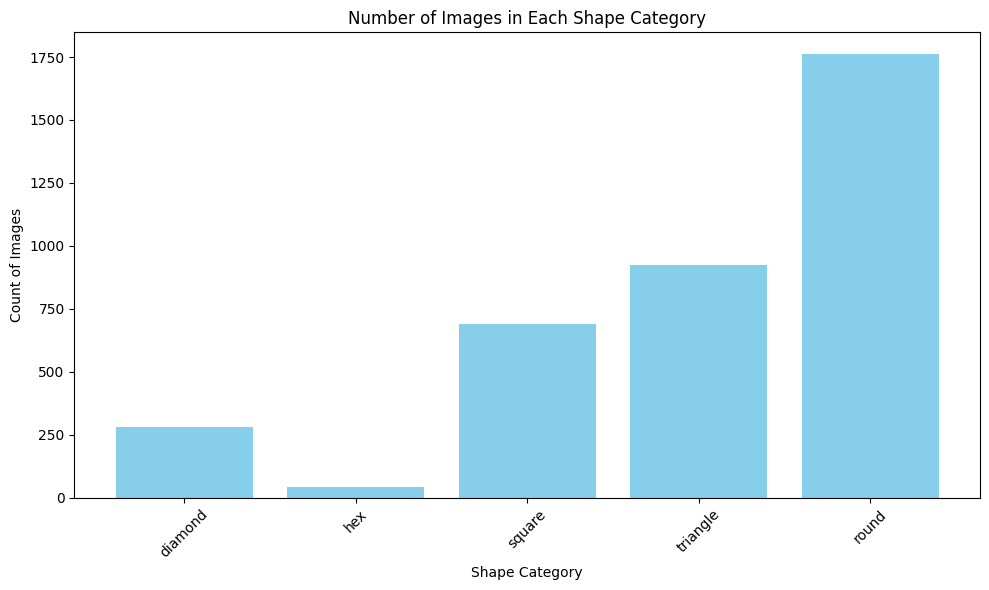

In [9]:
# Now, we need to aggregate these counts by shape for the histogram
shape_image_counts = {}

# Loop through the sign_counts to sum the counts for each shape
for sign_type in sign_counts:
    shape, _ = sign_type.split('/')  # Split the key to get the shape
    if shape not in shape_image_counts:
        shape_image_counts[shape] = 0
    shape_image_counts[shape] += sign_counts[sign_type]

# Now you have the total counts of images for each shape, let's plot a histogram


shapes = list(shape_image_counts.keys())
counts = list(shape_image_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(shapes, counts, color='skyblue')
plt.title('Number of Images in Each Shape Category')
plt.xlabel('Shape Category')
plt.ylabel('Count of Images')
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust the layout to ensure everything fits without overlap

# Show the plot
plt.show()


### Now I will analyze the number of images in each sub-directory i.e. image type in each shape using histogram

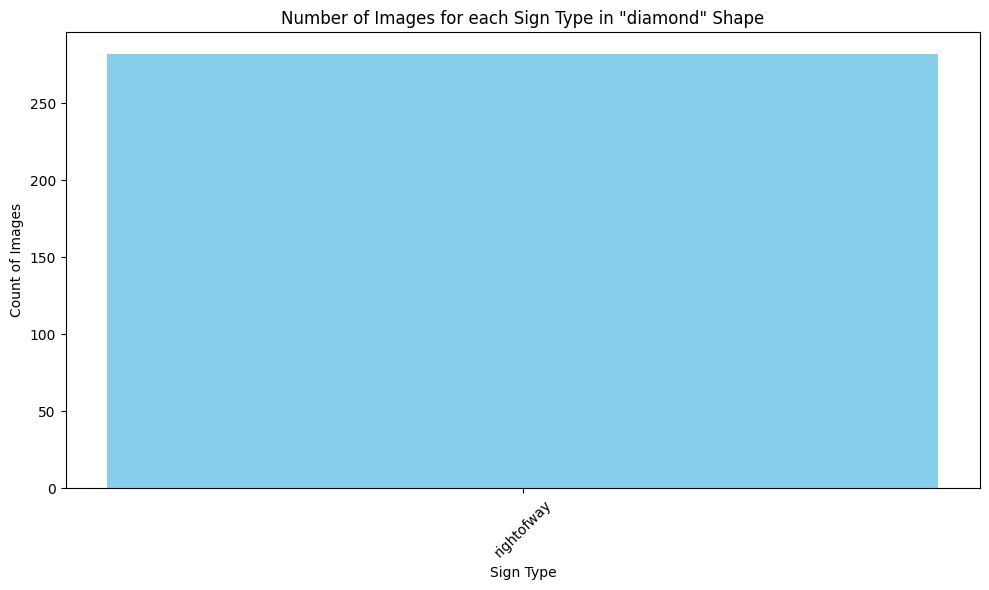

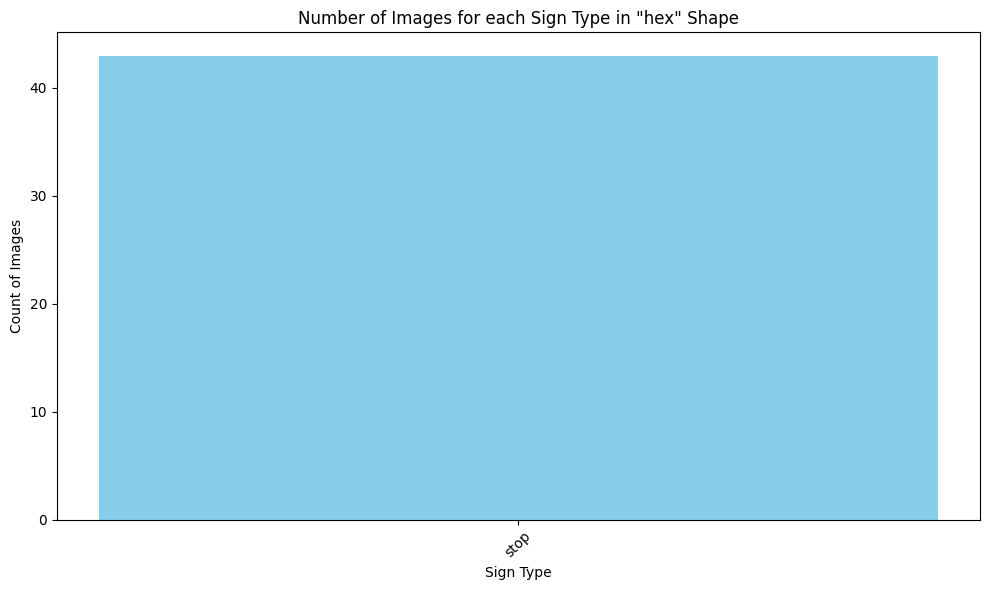

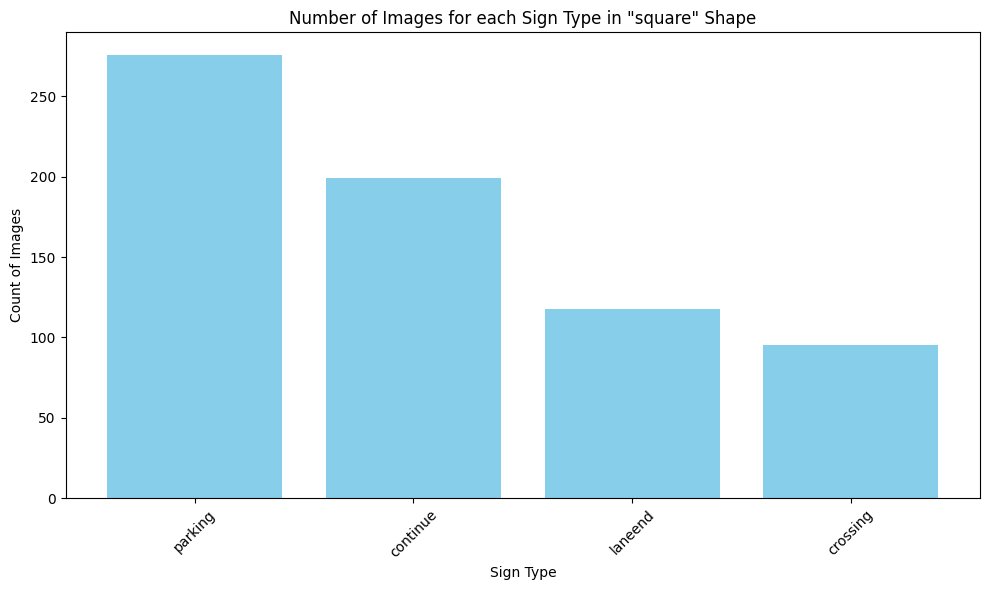

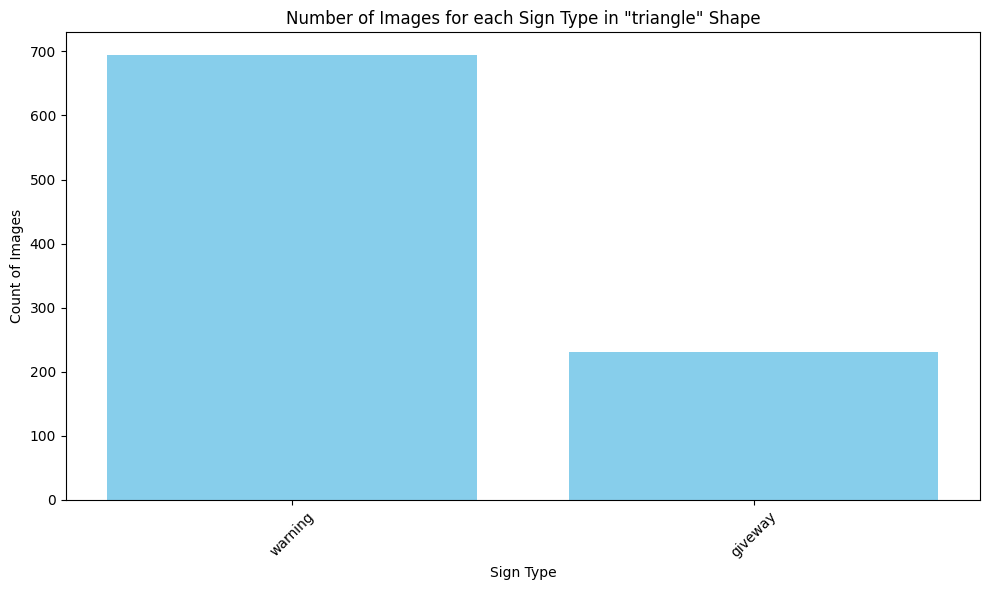

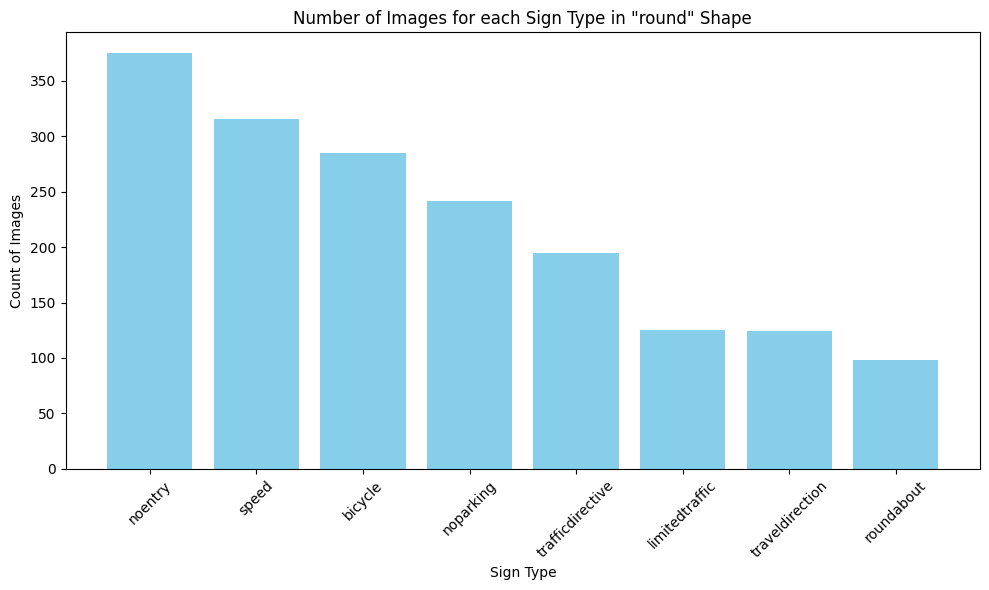

In [11]:
# Group the sign counts by shape.
grouped_sign_counts = {}
for sign_type, count in sign_counts.items():
    shape, type_name = sign_type.split('/')
    if shape not in grouped_sign_counts:
        grouped_sign_counts[shape] = {}
    grouped_sign_counts[shape][type_name] = count

# Plot histograms for each shape category.
for shape, type_counts in grouped_sign_counts.items():
    plt.figure(figsize=(10, 6))
    # Sort the types by count for better readability
    sorted_types = dict(sorted(type_counts.items(), key=lambda item: item[1], reverse=True))
    plt.bar(sorted_types.keys(), sorted_types.values(), color='skyblue')
    plt.title(f'Number of Images for each Sign Type in "{shape}" Shape')
    plt.xlabel('Sign Type')
    plt.ylabel('Count of Images')
    plt.xticks(rotation=45)  # Rotate the x-axis labels to 45 degrees for better visibility
    plt.tight_layout()
    plt.show()

## Analyzing Size Distribution

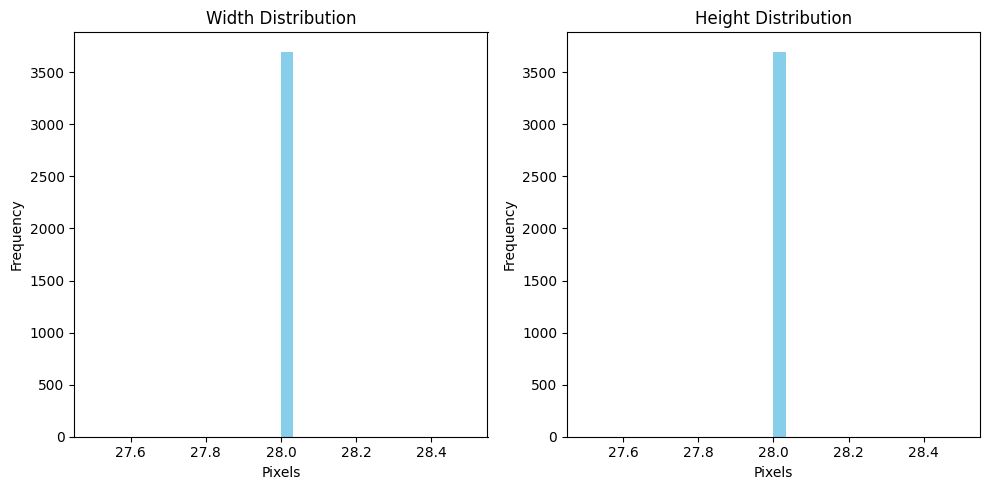

In [16]:
sizes = []

# Loop through each subdirectory and collect image sizes
for shape in os.listdir(base_dir):
    shape_dir = os.path.join(base_dir, shape)
    if os.path.isdir(shape_dir):
        for sign_type in os.listdir(shape_dir):
            sign_type_dir = os.path.join(shape_dir, sign_type)
            if os.path.isdir(sign_type_dir):
                for image_name in os.listdir(sign_type_dir):
                    image_path = os.path.join(sign_type_dir, image_name)
                    with Image.open(image_path) as img:
                        sizes.append(img.size)

df_sizes = pd.DataFrame(sizes, columns=['Width', 'Height'])

# Plotting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(df_sizes['Width'], bins=30, color='skyblue')
plt.title('Width Distribution')
plt.xlabel('Pixels')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df_sizes['Height'], bins=30, color='skyblue')
plt.title('Height Distribution')
plt.xlabel('Pixels')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Color Analysis

The following code computes and visualizes the average distribution of pixel intensities for the Red, Green, and Blue channels across all images in a specified dataset. It does this by:

1. Initializing storage to accumulate color data and track the number of images.
2. Iterating through the dataset's directory structure, processing each image to extract its color histograms.
3. Averaging these histograms by channel to get a sense of the typical color profile across the dataset.
4. Plotting the averaged histograms for visual analysis, presenting the commonality of pixel intensities in each color channel across the dataset.
The resulting visualizations provide insights into the dominant colors and brightness levels within the traffic sign images, which is valuable for understanding the data's characteristics and preparing for machine learning tasks.

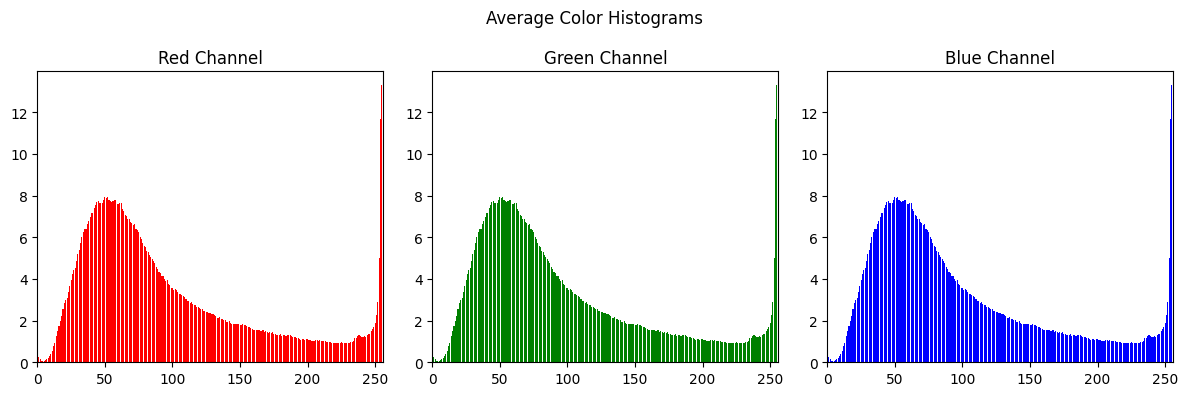

In [21]:
base_dir = 'trafficsigns_dataset'
color_sums = [np.zeros(256), np.zeros(256), np.zeros(256)]  # For RGB channels
num_images = 0

# Loop through each subdirectory and compute color histograms
for shape in os.listdir(base_dir):
    shape_dir = os.path.join(base_dir, shape)
    if os.path.isdir(shape_dir):
        for sign_type in os.listdir(shape_dir):
            sign_type_dir = os.path.join(shape_dir, sign_type)
            if os.path.isdir(sign_type_dir):
                for image_name in os.listdir(sign_type_dir):
                    image_path = os.path.join(sign_type_dir, image_name)
                    with Image.open(image_path) as img:
                        img = img.convert('RGB')  # Ensure image is in RGB
                        for i in range(3):  # RGB channels
                            hist, _ = np.histogram(img.getdata(band=i), bins=256, range=(0, 256))
                            color_sums[i] += hist
                        num_images += 1

# Calculate the average histograms
avg_histograms = [sums / num_images for sums in color_sums]

# Plot the average histograms
plt.figure(figsize=(12, 4))
colors = ['Red', 'Green', 'Blue']
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    plt.bar(range(256), avg_histograms[i], color=color.lower())
    plt.title(f'{color} Channel')
    plt.xlim([0, 256])
plt.suptitle('Average Color Histograms')
plt.tight_layout()
plt.show()


The following function checks whether a given image is in grayscale or not. 

In [22]:
def is_grey_scale(img_path):
    img = Image.open(img_path).convert('RGB')
    w, h = img.size
    for i in range(w):
        for j in range(h):
            r, g, b = img.getpixel((i, j))
            if r != g or r != b:
                return False
    return True

The following code is designed to automate the process of checking each image in the dataset to determine whether it is in grayscale or not. Here's what each part of the script does:

1. Set Base Directory: The base_dir variable is set to the directory containing the dataset, labeled 'trafficsigns_dataset'.
2. Iterate Through Directory Structure: The script loops through each subdirectory, which represents different shapes and types of traffic signs.
3. Open Each Image: Each image file is opened, and a check is performed to see if the image is in grayscale.
4. Check for Color: The is_grey_scale function (not shown in this snippet) is called for each image. This function checks if each pixel has the same value for the red, green, and blue color channels. If a pixel is found with differing values, the image is not in grayscale.
5. Output Result: If a colored image is found (meaning the image is not in grayscale), the script prints the path of the image and a message stating that not all images are in grayscale.
6. Early Exit: Once a single colored image is found, the script breaks out of the loop, ending the execution. This is done because only one instance of a colored image is needed to determine that the dataset is not entirely in grayscale.

In [25]:
base_dir = 'trafficsigns_dataset'
for shape in os.listdir(base_dir):
    shape_dir = os.path.join(base_dir, shape)
    if os.path.isdir(shape_dir):
        for sign_type in os.listdir(shape_dir):
            sign_type_dir = os.path.join(shape_dir, sign_type)
            if os.path.isdir(sign_type_dir):
                for image_name in os.listdir(sign_type_dir):
                    image_path = os.path.join(sign_type_dir, image_name)
                    if not is_grey_scale(image_path):
                        print(f"Colored image found: {image_path}")
                        print("Not All Images Are Gray")
                        break  # If one colored image is found, we can stop checking

There is no Output for the above code so we can confirm that all images are gray. 